<a href="https://colab.research.google.com/github/FatoniRahmat/Data-Analyst-in-Python/blob/main/Ecommerce_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup Environment & Run Packages

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
#current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import missingno as msno #missing data visualization module for Python

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

#Load Data

In [7]:
#Import dataset
sheet_url = 'https://docs.google.com/spreadsheets/d/1iBe8jff5BGEPhs4l5T8RNlJQwx-EGLNMaPu9IGrYVnc/edit#gid=1372867123'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
pd.set_option('display.max_columns', None)
df.head(2)

,id,first_name,last_name,age,gender,state,city,country,created_at,order_id,created_at_1,num_of_item,product_id,status,created_at_2,shipped_at,delivered_at,returned_at,sale_price,cost,category,name,brand,department
0,84996,Kelly,Pacheco,54,F,Paraná,Medianeira,Brasil,2020-07-04 18:41:00 UTC,106178,2021-09-05 18:41:00 UTC,3,14235,Processing,2021-09-05 15:46:43 UTC,NaN,NaN,NaN,0.02,0.008,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,Women
1,42830,Sarah,Perez,33,F,Anhui,Beijing,China,2021-12-02 05:09:00 UTC,53444,2022-02-10 05:09:00 UTC,3,14235,Shipped,2022-02-11 03:28:58 UTC,2022-02-11 15:24:00 UTC,NaN,NaN,0.02,0.008,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,Women
2,74566,Megan,Dawson,64,F,Ohio,Columbus,United States,2020-05-04 12:56:00 UTC,92991,2021-05-22 12:56:00 UTC,2,14159,Processing,2021-05-25 09:04:24 UTC,NaN,NaN,NaN,0.49,0.177,Accessories,Set of 2 - Replacement Insert For Checkbook Wa...,Made in USA,Women
3,11414,Monique,Walters,60,F,Seoul,Seoul,South Korea,2021-09-23 00:39:00 UTC,14108,2021-10-07 00:39:00 UTC,4,14159,Shipped,2021-10-09 21:25:01 UTC,2021-10-08 15:16:00 UTC,NaN,NaN,0.49,0.177,Accessories,Set of 2 - Replacement Insert For Checkbook Wa...,Made in USA,Women
4,81961,Carol,Johnson,66,F,Guangdong,Shaoyang,China,2019-12-17 07:45:00 UTC,102324,2021-08-21 07:45:00 UTC,2,14159,Shipped,2021-08-24 04:31:18 UTC,2021-08-22 16:56:00 UTC,NaN,NaN,0.49,0.177,Accessories,Set of 2 - Replacement Insert For Checkbook Wa...,Made in USA,Women


#Basic steps
1.Check Variable Names

2.Check Data Type

3.Handle Missing Values

4.Check Duplicate Records

##1. Check Variable Names
Column names provide a clear identification of the data contained within each column. By reviewing the column names, i can quickly understand the type of information stored in each column. This helps me make sense of the data and interpret it correctly.


In [8]:
df.columns

Index(['id', 'first_name', 'last_name', 'age', 'gender', 'state', 'city',
       'country', 'created_at', 'order_id', 'created_at_1', 'num_of_item',
       'product_id', 'status', 'created_at_2', 'shipped_at', 'delivered_at',
       'returned_at', 'sale_price', 'cost', 'category', 'name', 'brand',
       'department'],
      dtype='object')

Now, we change name of the columns:

In [9]:
df = df.rename(columns={'id': 'user_id', 'created_at': 'user_created_at', 'created_at_1': 'order_created_at',
                     'created_at_2': 'product_created_at', 'shipped_at': 'product_shipped_at',
                     'delivered_at': 'product_delivered_at', 'returned_at': 'product_returned_at'})

Now, we change the order of the columns:

In [10]:
col_order = ['user_id', 'first_name', 'last_name', 'age', 'gender', 'state', 'city',
             'country', 'user_created_at', 'order_id', 'order_created_at', 'num_of_item',
             'product_id', 'name', 'brand', 'category', 'department', 'sale_price',
             'cost', 'product_created_at', 'product_shipped_at', 'product_delivered_at',
             'product_returned_at', 'status']
df = df[col_order]
pd.set_option('display.max_columns', None)
df.head(2)

,user_id,first_name,last_name,age,gender,state,city,country,user_created_at,order_id,order_created_at,num_of_item,product_id,name,brand,category,department,sale_price,cost,product_created_at,product_shipped_at,product_delivered_at,product_returned_at,status
0,84996,Kelly,Pacheco,54,F,Paraná,Medianeira,Brasil,2020-07-04 18:41:00 UTC,106178,2021-09-05 18:41:00 UTC,3,14235,Indestructable Aluminum Aluma Wallet - RED,marshal,Accessories,Women,0.02,0.008,2021-09-05 15:46:43 UTC,NaN,NaN,NaN,Processing
1,42830,Sarah,Perez,33,F,Anhui,Beijing,China,2021-12-02 05:09:00 UTC,53444,2022-02-10 05:09:00 UTC,3,14235,Indestructable Aluminum Aluma Wallet - RED,marshal,Accessories,Women,0.02,0.008,2022-02-11 03:28:58 UTC,2022-02-11 15:24:00 UTC,NaN,NaN,Shipped


##2. Check Data Type
Checking the data types is an important step in data cleaning because it helps ensure the consistency, accuracy, and reliability of the data.

In [11]:
df.dtypes

user_id                   int64
first_name               object
last_name                object
age                       int64
gender                   object
state                    object
city                     object
country                  object
user_created_at          object
order_id                  int64
order_created_at         object
num_of_item               int64
product_id                int64
name                     object
brand                    object
category                 object
department               object
sale_price              float64
cost                    float64
product_created_at       object
product_shipped_at       object
product_delivered_at     object
product_returned_at      object
status                   object
dtype: object

Based on data documentation, we must check whether the data type of variables is correct or not. The result shows, there is something wrong about user_id, age, user_created_at, order_id, order_created_at, product_id, product_created_at, product_shipped_at, product_delivered_at, product_returned_at.

In [37]:
df['user_created_at'] = pd.to_datetime(df.user_created_at).dt.tz_localize(None)
df['order_created_at'] = pd.to_datetime(df.order_created_at).dt.tz_localize(None)
df['product_created_at'] = pd.to_datetime(df.product_created_at).dt.tz_localize(None)
df['product_shipped_at'] = pd.to_datetime(df.product_shipped_at).dt.tz_localize(None)
df['product_delivered_at'] = pd.to_datetime(df.product_delivered_at).dt.tz_localize(None)
df['product_returned_at'] = pd.to_datetime(df.product_returned_at).dt.tz_localize(None)
df['user_id'] = df['user_id'].astype('object')
df['age'] = df['age'].astype('object')
df['order_id'] = df['order_id'].astype('object')
df['product_id'] = df['product_id'].astype('object')
df.dtypes

user_id                         object
first_name                      object
last_name                       object
age                             object
gender                          object
state                           object
city                            object
country                         object
user_created_at         datetime64[ns]
order_id                        object
order_created_at        datetime64[ns]
num_of_item                      int64
product_id                      object
name                            object
brand                           object
category                        object
department                      object
sale_price                     float64
cost                           float64
product_created_at      datetime64[ns]
product_shipped_at      datetime64[ns]
product_delivered_at    datetime64[ns]
product_returned_at     datetime64[ns]
status                          object
dtype: object

##3. Handle Missing Values
Checking for missing values is an important step in data cleaning because missing values can have a significant impact on the quality and reliability of the data analysis. Missing values can lead to incomplete or inaccurate data, which can skew the analysis and produce misleading results. By identifying and handling missing values appropriately, me ensure the integrity and reliability of the data.

In [38]:
def nulls(df):
    null_values = pd.DataFrame(df.isnull().sum())
    null_values[1] = null_values[0] / len(df)
    null_values.columns = ['count','%pct']
    filtered_null = null_values[null_values['%pct'] > 0].sort_values(by='%pct', ascending=False)
    return filtered_null
nulls(df)

,count,%pct
product_returned_at,55544,0.900913
product_delivered_at,39987,0.648582
product_shipped_at,21710,0.352132
city,608,0.009862
brand,56,0.000908
name,6,0.000097


From the results above, we know that the most missing values are the product_shipped_at, product_delivered_at, product_returned_at columns. Because the data is influenced by the status column, I chose to leave it alone. For missing data less than 5% I will drop rows.

In [39]:
df = df.dropna(subset = ['city', 'name', 'brand',])

In [48]:
df.describe().round(2)

,num_of_item,sale_price,cost
count,60984.00,60984.00,60984.00
mean,1.89,59.91,28.82
std,1.06,67.81,31.39
min,1.00,0.02,0.01
25%,1.00,24.65,11.41
50%,2.00,39.99,19.94
75%,2.00,69.98,34.80
max,4.00,999.00,537.28


In [ ]:
df = df[df.num_of_item > 0]

##4. Check Duplicate Rows
Duplicate rows can compromise the integrity of the dataset. If we have multiple identical rows, it can lead to inaccurate statistical analysis, misleading results, and duplicate entries in downstream processes. By identifying and removing duplicate rows, we ensure that the data accurately represents the underlying information.

In [41]:
df.duplicated().sum()

0

##Export the File
First, we remove the Sanity column that we made it before, and then export the cleaned data.

In [49]:
df.to_csv('Ecommerce_Dataset_Cleaned.csv')

#Exploratory Data Analysis (EDA)

##1. How many orders made by the customers?

In [51]:
df.groupby(by=['user_id','country'], as_index=False)['order_id'].count().head()

,user_id,country,order_id
0,8,South Korea,2
1,9,France,1
2,11,China,4
3,14,China,1
4,22,United States,1


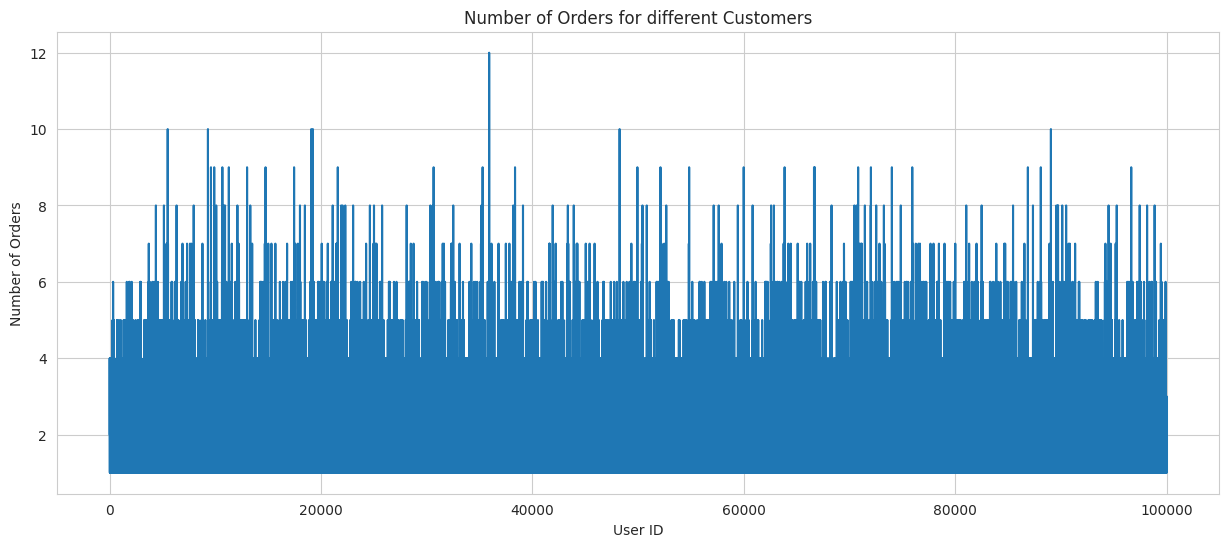

In [56]:
orders = df.groupby(by=['user_id','country'], as_index=False)['order_id'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.user_id, orders.order_id)
plt.xlabel('User ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

##2. Check TOP 5 most number of orders

In [58]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='order_id', ascending=False).head()

The TOP 5 customers with most number of orders...


,user_id,country,order_id
12012,35906,United States,12
6400,19076,China,10
1806,5492,France,10
6448,19226,United Kingdom,10
29805,89054,United Kingdom,10
